# Features Effect on House Pricing


##  Business Understanding
the objective is to show that the age of the house, distance to nearest MRT, number of stores nearby
can affect house pricing. To sum up I am going to use the data to find answers to these questions:

1. How does the price changes with the **age of the house**?
2. How could the **distance of the nearst MRT** affect house pricing?
3. What is the role of **nearby stores** in house pricing?

I will be using the data found on Kaggle [here](https://www.kaggle.com/quantbruce/real-estate-price-prediction).

##  Data Understanding
In this phase I will be collecting and exploring this dataset

In [12]:
# Importing the important libraries
import numpy as np # for linear algebra calculations
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # statistical data visualization library
import matplotlib.pyplot as plt # plotting library
from numpy.polynomial.polynomial import polyfit # generating best fit

# Kaggle related portion of code
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [22]:
# Reading the dataset
df = pd.read_csv("Real estate.csv")


print("Shape of the data:", df.shape) # -- (418, 8)
print("Columns in The dataset:\n", df.columns)
df.head()

Shape of the data: (414, 8)
Columns in The dataset:
 Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Now let's dig deeper in the data and plot the correlation heatmap

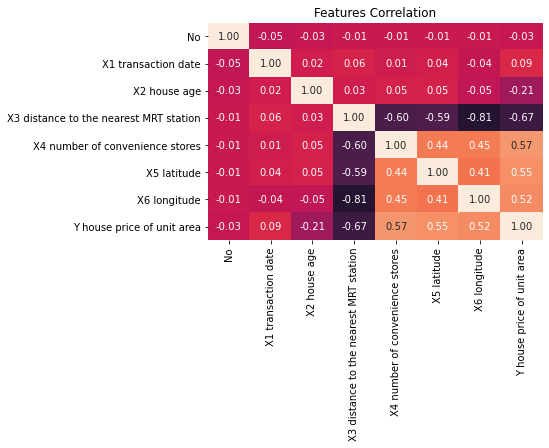

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [14]:
# Plotting the Correlation Heatmap
ax = plt.axes()
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt ='.2f', cbar = False, ax = ax)
ax.set_title('Features Correlation')
plt.show()

df.describe()

## Data Preparation
In this phase I will prepare the data to be used and select the needed features by:


### 1- Neglecting unuseful information
From the **heatmap plot** above I got that the <code>No</code> Column has almost <code>0</code> correlation coefficient with the target vector, as well as with any other column. so it may bias the data in unintended way, so I have to remove it.

In [15]:
df = df.drop(columns = ["No"], axis = 1)

### 2- Checking for missing values and handle them properly.
Let's see which columns in the data have missing values

In [5]:
print("Total missing values:", df.isna().sum().sum()) # -- 0

Total missing values: 0


Looks like the data is full and that I do NOT have any missing values to impute.

## 3- Handling and encoding categorical variables appropriately
Let's see how many column have categorical data

In [16]:
df.dtypes

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Looks like I do NOT have any categorical values to encode.

##  Modeling the Data
In this phase I will be using the standard X-Y plots to see how can each of selected factors affect the pricing.

In [17]:
def fit_feature_vs_price(feature : str):
    feature_df = df[feature]
    price = df['Y house price of unit area']
    
    #Plot feature against against price data points
    plt.plot(feature_df, price, 'bo', label = 'Data points')
    
    # to return the coefficients of approximated eqn 
    tmp = np.polyfit(feature_df, price, 5)
    p = np.poly1d(tmp) # returns the equation of n-degree
    xp = np.linspace(feature_df.min(), feature_df.max(), 50) # generate points
    
    # plotting using the generated equation
    _ = plt.plot(xp, p(xp), 'g-', label = 'Best Fitted Curve')

    # plot specs.
    plt.xlabel(feature.capitalize()) # providing the x-axis label
    plt.ylabel('Price') # providing the y-axis label
    plt.title(feature.capitalize() + ' vs ' + 'Price') # providing a title for the plot
    plt.legend() # adding legends to the plot
    plt.show() # showing the plot

##  Evaluation

### Q1: How does the price changes with the age of the house?

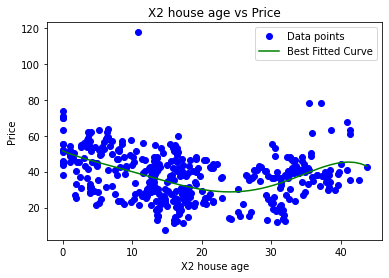

In [18]:
fit_feature_vs_price('X2 house age')

It appears that as the age **increases the price decrease for the first part**, then **it got up again! maybe it comes closer to be proven strong building against time** although at some point **the curve went down again, I think this is cuz being so old is not accepteable**.

### Q2: How could the **distance of the nearst MRT** affect house pricing?

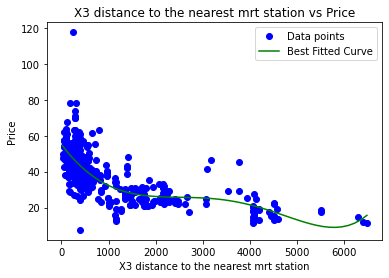

In [19]:
fit_feature_vs_price('X3 distance to the nearest MRT station')

As predicted that **the nearer** the MRT **the higher** the price, being too far from any MRT will make the transportation harder and that should affect your house pricing as well.

## Q3: What is the role of nearby stores in house pricing?

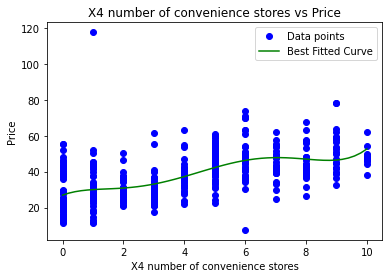

In [20]:
fit_feature_vs_price('X4 number of convenience stores')

Looks like there's an **increasing trend** with the number of convenience stores.The more the nearby stores, the more services you get.

### Summary:
Using data it's proven that age, distance of nearst MRT, number of nearby stores can alter the pricing of your house effectively, Happy Sale!

### Links used:

1. [seaborn.heatmap guide](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
2. [Better Heatmaps and Correlation Matrix Plots in Python](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)
3. [How do I add a title to Seaborn Heatmap?](https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap)
4. [For fitting, you can play with this awesome tool](http://madrury.github.io/smoothers/)
5. [Fitting the scattered points with **polyfit** and **np.poly1d**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) 
6. [CRISP-DM Process Guide](https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome)
